# Final Project Submission

**Business Problem:**
<br>King County Real Estate has contracted us to investigate what home features have the greatest impact on pricing to speed up the sales process. We will help them create a model to assist in pricing homes before listing.

# Exploratory Data Analysis

Step 1: Import and read data
<br> Step 2: Check datatypes
<br> Step 3: Check duplicates
<br> Step 4: Check nulls/missing values
<br> Step 5: Check outliers



**Step 1: Import and read data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats


In [2]:
data = pd.read_csv('data_folder/kc_house_data.csv', index_col = 0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
incomes = pd.read_csv('data_folder/incomes.csv')
incomes.head()

,income per capita,city
0,"$134,387.00",Hunts Point
1,"$129,137.00",Yarrow Point
2,"$106,393.00",Medina
3,"$102,990.00",Methow
4,"$89,107.00",Clyde Hill


In [4]:
city_names = pd.read_csv('data_folder/city_names.csv')
city_names = city_names[city_names['County']=='King']
city_names.columns = [col.lower().replace(" ", "") for col in list(city_names.columns)]
city_names.columns
 

Index(['zipcode', 'city', 'county'], dtype='object')

In [5]:
city_incomes = city_names.merge(incomes, on ='city' )
data = data.merge(city_incomes, on ='zipcode' )
data.columns = [col.replace(" ", "_") for col in list(data.columns)]

data['city'].value_counts()

Seattle          8973
Renton           1597
Bellevue         1407
Kent             1201
Redmond           977
Kirkland          977
Auburn            911
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      589
Woodinville       471
Snoqualmie        308
Kenmore           283
Mercer Island     282
Enumclaw          233
North Bend        220
Bothell           195
Duvall            190
Carnation         124
Vashon            117
Black Diamond     100
Fall City          80
Medina             50
Name: city, dtype: int64

**Step 2: Check datatypes**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               21597 non-null  object 
 1   price              21597 non-null  float64
 2   bedrooms           21597 non-null  int64  
 3   bathrooms          21597 non-null  float64
 4   sqft_living        21597 non-null  int64  
 5   sqft_lot           21597 non-null  int64  
 6   floors             21597 non-null  float64
 7   waterfront         19221 non-null  float64
 8   view               21534 non-null  float64
 9   condition          21597 non-null  int64  
 10  grade              21597 non-null  int64  
 11  sqft_above         21597 non-null  int64  
 12  sqft_basement      21597 non-null  object 
 13  yr_built           21597 non-null  int64  
 14  yr_renovated       17755 non-null  float64
 15  zipcode            21597 non-null  int64  
 16  lat                215

`income_per_capita` and `sqft_basement` are of type object which we want to fix

In [7]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

In [8]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
4820.0        1
1024.0        1
176.0         1
374.0         1
1930.0        1
Name: sqft_basement, Length: 304, dtype: int64

We will have to fix the `?` value.

**Step 3: Check duplicates**

In [9]:
data.duplicated().sum()

0

No duplicates.

**Step 4: Check nulls/missing values**

In [10]:
data.isnull().sum()

date                    0
price                   0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront           2376
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated         3842
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
city                    0
county                  0
income_per_capita       0
dtype: int64

We will have to take a deeper look into `waterfront`, `yr_renovated`, and `view` to handle the nulls

In [11]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

There aren't enough homes with waterfront views to justify continuing to evaluate this variable as a predictor. 


**Step 5: Check outliers**

In [12]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


All of the `sqft_` variables seem to have outliers we want to handle. As well, `bedrooms` has high outlier of 33. 

In [13]:
data[(data['bedrooms']==33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,county,income_per_capita
5423,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,1947,0.0,98103,47.6878,-122.331,1330,4700,Seattle,King,"$44,167.00"


Check distribution (boxplots) of `continuous_features` (`sqft_` variables and `bedrooms`)

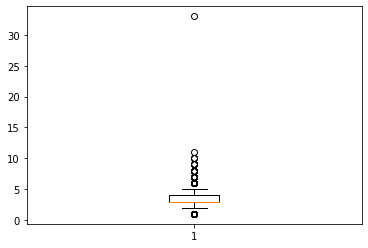

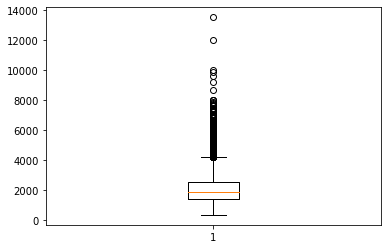

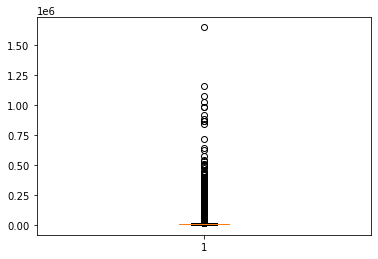

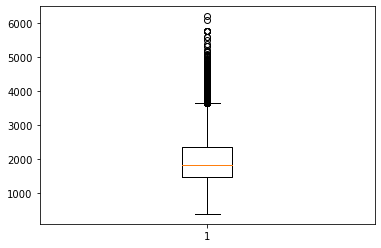

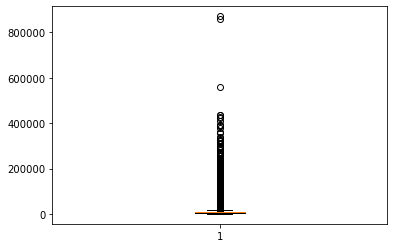

In [14]:
outliers = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

for outlier in outliers:
    plt.figure()
    plt.boxplot(data[outlier])

# Data Cleaning

Step 1: Fix structural errors (income_per_capita, bathroom, and sqft_basement values) 
<br> Step 2: Handle missing data 
<br> Step 3: Filter unwanted outliers
<br> Step 4: Modify and/or remove irrelevant observations

**Step 1: Fix structural errors (income_per_capita, bathroom, and sqft_basement values)**

In [15]:
data['income_per_capita']=data['income_per_capita'].map(lambda x: float(x[1:].replace(",","")))
data['income_per_capita'].value_counts()

44167.0     8973
32136.0     1597
50405.0     1407
25497.0     1201
48902.0      977
50787.0      977
26918.0      911
56662.0      800
27145.0      779
49532.0      733
36447.0      589
51067.0      471
48885.0      308
39387.0      283
75396.0      282
27381.0      233
36460.0      220
38841.0      195
38805.0      190
29323.0      124
42129.0      117
32301.0      100
34603.0       80
106393.0      50
Name: income_per_capita, dtype: int64

In [16]:
data['bathrooms']=round(data['bathrooms']*2)/2
data['bathrooms'].value_counts()

2.0    7025
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
7.0       2
6.5       2
7.5       1
Name: bathrooms, dtype: int64

In [17]:
data = data[data.sqft_basement != '?']
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1816.0        1
2720.0        1
1008.0        1
2250.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

**Step 2: Handle missing data**

In [18]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

**Step 3: Filter unwanted outliers**

Define upper and lower limits as 3 standard deviations away from the mean 

In [19]:
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit


def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit


Removing outliers from continuous `sqft` variables


In [20]:
data = data[(data['sqft_living'] >= lower_limit(data['sqft_living'])) 
            & (data['sqft_living'] <= upper_limit(data['sqft_living']))]


In [21]:
data = data[(data['sqft_lot'] >= lower_limit(data['sqft_lot'])) 
            & (data['sqft_lot'] <= upper_limit(data['sqft_lot']))]

Remove outlier from bedroom data 

In [22]:
data = data[(data['bedrooms']!=33)]

In [23]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,income_per_capita
count,2.057800e+04,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,18298.000000,20520.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000,20578.000000
mean,5.223590e+05,3.356935,2.109194,2028.218437,10718.129070,1.487171,0.006503,0.215741,3.413743,7.612547,1745.578045,282.640393,1970.643843,68.092186,98078.707892,47.561255,-122.217483,1961.957770,10347.892458,42408.743124
std,3.134542e+05,0.892407,0.727772,815.307487,13298.770461,0.538935,0.080383,0.734039,0.651628,1.117177,755.959331,423.089052,29.346749,362.340981,53.669782,0.138118,0.138160,656.350709,15645.744453,9549.977173
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000,25497.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.473325,-122.330000,1480.000000,5060.000000,36447.000000
50%,4.470000e+05,3.000000,2.000000,1890.000000,7502.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98070.000000,47.573000,-122.236000,1820.000000,7551.000000,44167.000000
75%,6.310000e+05,4.000000,2.500000,2510.000000,10280.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,550.000000,1996.000000,0.000000,98118.000000,47.678900,-122.130000,2330.000000,9870.000000,48902.000000
max,3.640000e+06,11.000000,7.500000,4830.000000,133729.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4830.000000,2330.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000,106393.000000


The unwanted outliers have been removed.

**Step 4: Modify and/or remove irrelevant observations**

Turn `basement` and `yr_renovated` variables into boolean `has_basement` and `is_renovated`. 

In [24]:
data['has_basement']= np.where(data['sqft_basement']!= 0, True, False)
data['is_renovated']= np.where(data['yr_renovated']!= 0, True, False)
data['age']=2021-data['yr_built']

Drop variables that will not be part of the model

In [25]:
data.drop(['waterfront','view', 'sqft_above', 'zipcode', 'yr_renovated','yr_built',
           'sqft_basement', 'county','grade'], axis=1, inplace= True)

After including `grade` in our third iteration of the model,  we realized it's best to drop it due to its high collinearity (.73) and vif (74) with sqft_living  

# Post-cleaning exploratory data analysis

Look at the correlations of each columns with price.

In [26]:
price_corrs = data.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price                1.000000
sqft_living          0.656731
sqft_living15        0.584051
income_per_capita    0.487588
bathrooms            0.472039
lat                  0.352238
bedrooms             0.301039
floors               0.254024
has_basement         0.175016
is_renovated         0.126197
sqft_lot             0.110131
sqft_lot15           0.065355
condition            0.051657
age                  0.033983
long                 0.008380
Name: price, dtype: float64

Create a heat map to identify correlation between variables to look for issues with multicollinearity.

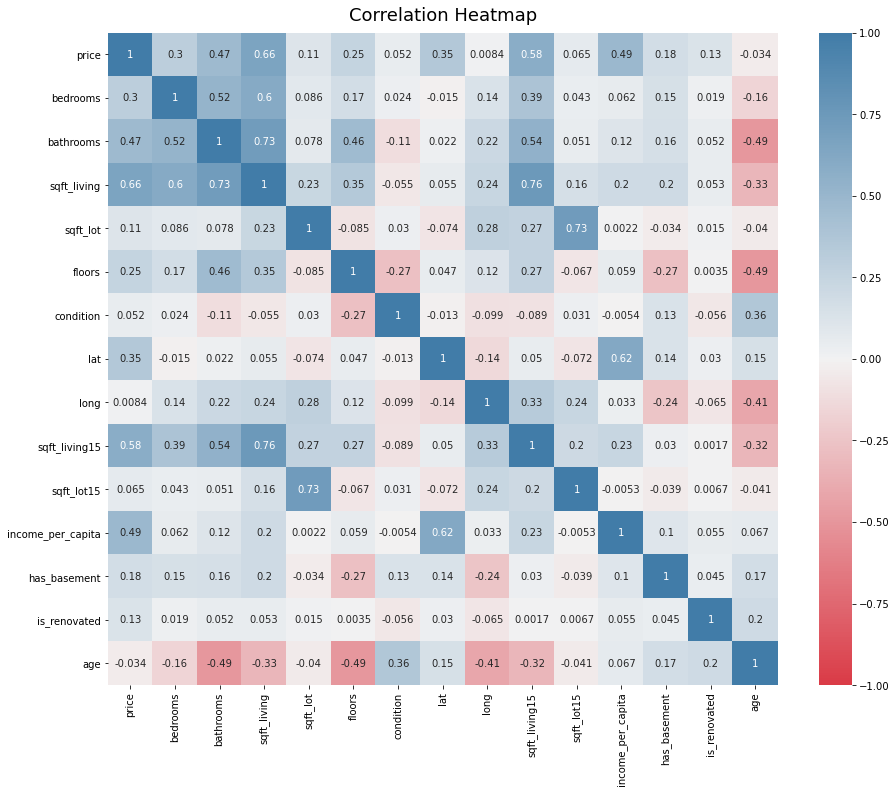

In [27]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Drop the `sqft_living15` and `sqft_lot15` as they are highly correlated with `sqft_living` and `sqft_lot`.

In [28]:
data.drop(labels = ['sqft_living15','sqft_lot15'], axis=1, inplace=True)


**Check distribution of discrete variables**

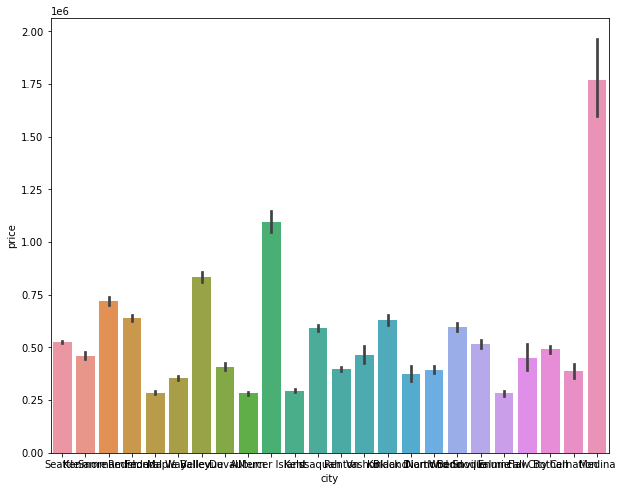

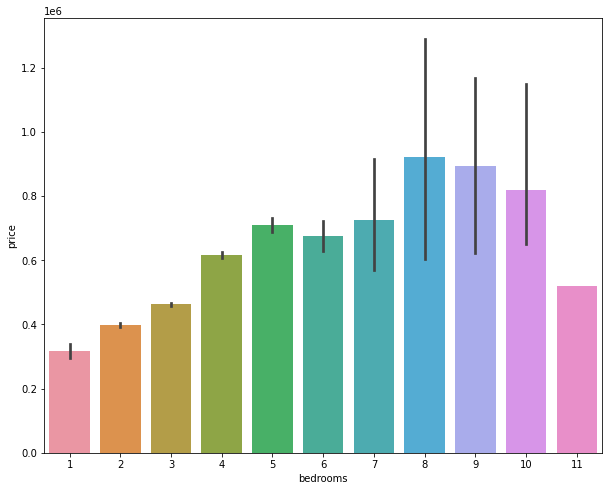

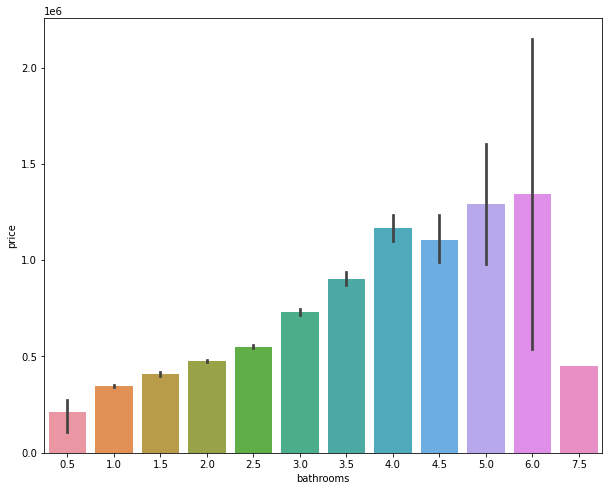

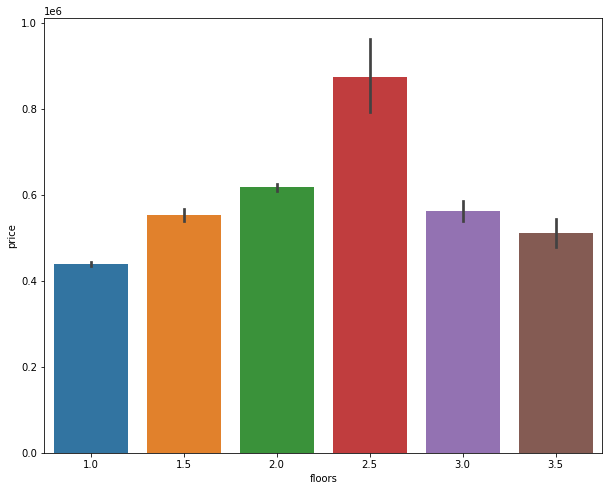

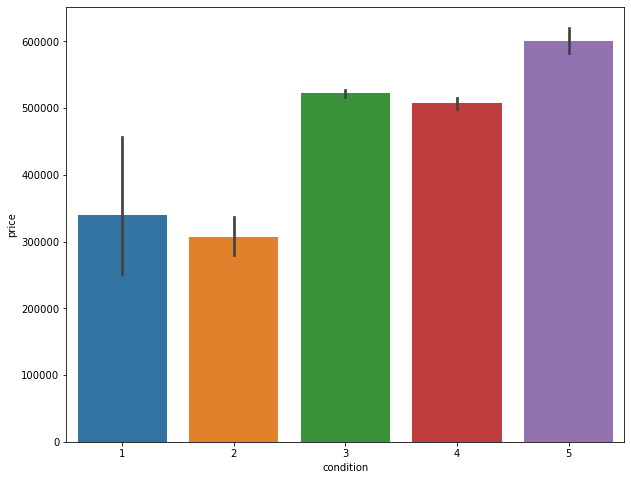

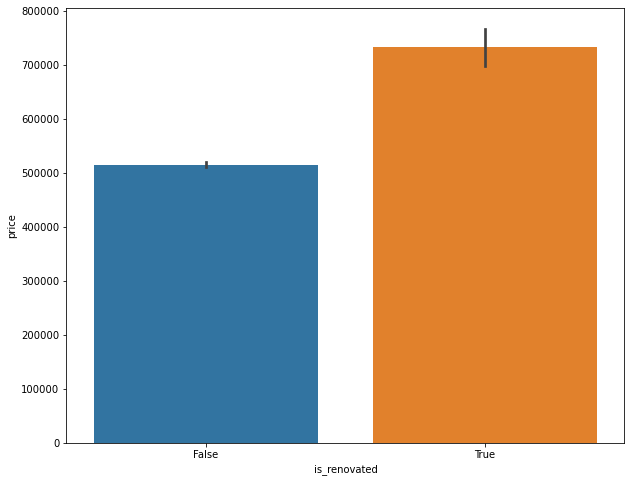

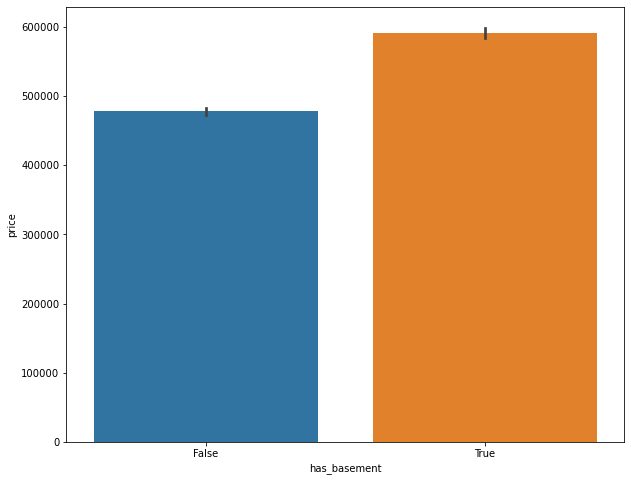

In [29]:
discrete_features = ['city','bedrooms', 'bathrooms', 'floors', 'condition', 'is_renovated','has_basement']

for feature in discrete_features:
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='price', data=data)

In [30]:
data.drop(['city'], axis=1, inplace=True)

# Preprocessing

**Create dummy variables**

In [31]:
dummy = pd.get_dummies(data, columns=['is_renovated', 'has_basement'], drop_first=True)
dummy.drop(labels=['date'], axis=1, inplace=True)
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20578 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20578 non-null  float64
 1   bedrooms           20578 non-null  int64  
 2   bathrooms          20578 non-null  float64
 3   sqft_living        20578 non-null  int64  
 4   sqft_lot           20578 non-null  int64  
 5   floors             20578 non-null  float64
 6   condition          20578 non-null  int64  
 7   lat                20578 non-null  float64
 8   long               20578 non-null  float64
 9   income_per_capita  20578 non-null  float64
 10  age                20578 non-null  int64  
 11  is_renovated_True  20578 non-null  uint8  
 12  has_basement_True  20578 non-null  uint8  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 2.4 MB


**Train-Test Split**

In [32]:
y = dummy['price']
X = dummy.drop(['price'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(len(X_train), len(X_test), len(y_train), len(y_test))


16462 4116 16462 4116


# Modeling

Regression 0 : Trial Regression 
<br>  - simple baseline using `sqft_living` to get understanding of data
<br>  - calculate and observe MSE 

Regression 1 : Standardized Variablies
<br>  - standardize variables and check distribution
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE 
<br>  - Model Validation : Test normality (QQ Plot)  

<br>Regression 2 : Using Log-Scaled & Standardized Variables 
<br>  - log variables, standardize variables, and check distribution
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality and Homoskedasity (QQ Plot and regression against one regressor)

<br>Regression 3 : Recursive Feature Elimination
<br>  - Use RFE to eliminate "useless" estimators and fit model to new equation
<br>  - model and interpret summary
<br>  - Model Validation : compare training and test MSE
<br>  - Model Validation : Test normality and Homoskedasity (QQ Plot and regression against one regressor)

**Regression 0: Trial Regression**

In [35]:
pred = sm.add_constant(X_train['sqft_living'])
model = sm.OLS(endog=y_train, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:17:19   Log-Likelihood:            -2.2712e+05
No. Observations:               16462   AIC:                         4.542e+05
Df Residuals:                   16460   BIC:                         4.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.485e+04   4959.407      2.995      0.003    5131.187    2.46e+04
sqft_living   250.4128      2.268    110.403      0.000     245.967     254.859
==============================================================================
Omnibus:                     8377.137   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103920.895
Skew:                           2.154   Prob(JB):                         0.00
Kurtosis:                      14.530   Cond. No.                     5.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the baseline regression we chose `sqft_living` as our variable since it had the highest coefficient. The R2 is .42. We will see how much this increases with the future iterations of this model. 

In [36]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20578 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              20578 non-null  float64
 1   bedrooms           20578 non-null  int64  
 2   bathrooms          20578 non-null  float64
 3   sqft_living        20578 non-null  int64  
 4   sqft_lot           20578 non-null  int64  
 5   floors             20578 non-null  float64
 6   condition          20578 non-null  int64  
 7   lat                20578 non-null  float64
 8   long               20578 non-null  float64
 9   income_per_capita  20578 non-null  float64
 10  age                20578 non-null  int64  
 11  is_renovated_True  20578 non-null  uint8  
 12  has_basement_True  20578 non-null  uint8  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 2.4 MB


In [37]:
  
# the independent variables set
X = dummy[['income_per_capita','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','age']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0  income_per_capita  17.896824
1           bedrooms  22.947003
2          bathrooms  24.970478
3        sqft_living  19.216245
4           sqft_lot   1.800153
5             floors  10.717147
6          condition  22.593295
7                age   6.397486


In [38]:
X_train_sqft = X_train['sqft_living'].values.reshape(-1, 1)    
X_test_sqft = X_test['sqft_living'].values.reshape(-1, 1)    


linreg = LinearRegression()
linreg.fit(X_train_sqft, y_train)


y_hat_train = linreg.predict(X_train_sqft)
y_hat_test = linreg.predict(X_test_sqft)
 

train_scaled_mse = mean_squared_error(y_train, y_hat_train, squared=False)
test_scaled_mse = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train RMSE:', train_scaled_mse)
print('Test RMSE:', test_scaled_mse)



Train RMSE: 237415.53728572588
Test RMSE: 232214.31525601062


Calculated the train and test mean squared error for comparison

A few observation with this extremely high Mean Squared Error:
<br> 1. The difference between the train and test MSE isn't high, so it validated our train and test datasets.
<br> 2. The high MSE lead us to do feature engineering in 2 phases: first scaling, and then logging. 

**Regression 1: Standardized Variablies**

Standardize X training and test variables

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
X_test = pd.DataFrame.copy(X_test)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_test_scaled, columns = X_test.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,lat,long,income_per_capita,age,is_renovated_True,has_basement_True
0,-1.528467,-1.528736,-0.991100,-0.430129,-0.903385,-0.632977,0.971003,-1.065946,0.189254,0.328464,-0.185041,-0.798653
1,-0.401255,-0.145948,0.148796,-0.494717,-0.903385,2.441243,0.039235,-1.364372,0.189254,0.362473,-0.185041,1.252108
2,-0.401255,-0.145948,1.987338,-0.406063,0.953466,0.904133,0.240659,-0.534604,0.189254,0.804594,-0.185041,1.252108
3,-1.528467,-0.145948,-0.598878,-0.433205,0.025041,-0.632977,-1.758368,-1.284306,-1.598801,-0.521769,-0.185041,-0.798653
4,-0.401255,-0.145948,-0.905302,-0.724389,2.810317,-0.632977,0.718861,-0.920373,0.189254,-1.031908,-0.185041,-0.798653
...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.725957,0.545446,0.185567,-0.104037,0.953466,-0.632977,-1.408411,1.059422,-1.771913,-1.133936,-0.185041,-0.798653
4112,0.725957,-0.145948,0.075254,0.012759,-0.903385,0.904133,0.102995,-0.039655,3.469666,0.668557,-0.185041,-0.798653
4113,-0.401255,-0.145948,0.602303,-0.469036,-0.903385,2.441243,0.553664,-1.335257,0.189254,0.566529,-0.185041,1.252108
4114,-0.401255,-1.528736,-0.844017,0.381833,-0.903385,0.904133,-1.733733,0.542637,-1.771913,-0.249694,-0.185041,-0.798653


Distribution after scaling. This will lead to a fairer comparison of the correlation coefficients.

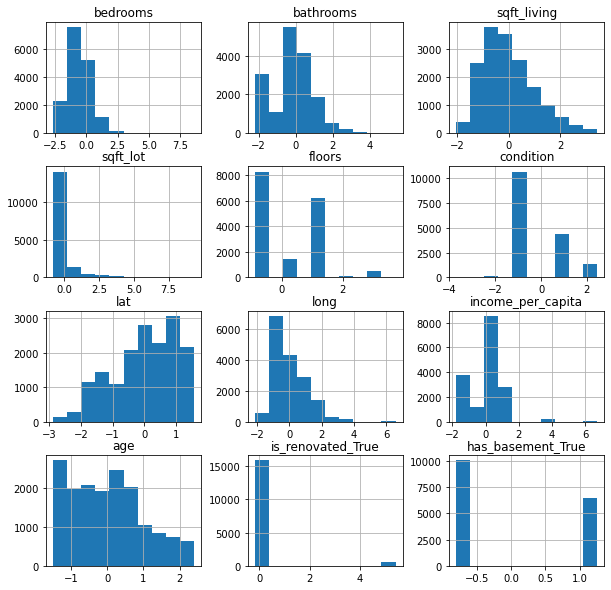

In [41]:
pd.DataFrame(X_train_scaled, columns = X_train.columns).hist(figsize=[10,10]);

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)

pred = sm.add_constant(X_train_scaled)
model = sm.OLS(endog=y_train, exog=pred).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2268.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:17:20   Log-Likelihood:            -2.2364e+05
No. Observations:               16462   AIC:                         4.473e+05
Df Residuals:                   16449   BIC:                         4.474e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.228e+05   1498.929    348.809      0.000     5.2e+05    5.26e+05
bedrooms          -4.208e+04   1931.462    -21.784      0.000   -4.59e+04   -3.83e+04
bathrooms          3.047e+04   2561.444     11.896      0.000    2.55e+04    3.55e+04
sqft_living        2.057e+05   2545.211     80.834      0.000    2.01e+05    2.11e+05
sqft_lot           2719.0307   1644.161      1.654      0.098    -503.702    5941.763
floors             2.277e+04   2015.542     11.295      0.000    1.88e+04    2.67e+04
condition          2.275e+04   1655.439     13.742      0.000    1.95e+04     2.6e+04
lat                3.311e+04   1978.793     16.734      0.000    2.92e+04     3.7e+04
long              -3.206e+04   1816.618    -17.649      0.000   -3.56e+04   -2.85e+04
income_per_capita  8.803e+04   1975.898     44.550      0.000    8.42e+04    9.19e+04
age                4.407e+04   2226.296     19.794      0.000    3.97e+04    4.84e+04
is_renovated_True  1.372e+04   1578.314      8.692      0.000    1.06e+04    1.68e+04
has_basement_True -1.089e+04   1789.200     -6.085      0.000   -1.44e+04   -7379.858
==============================================================================
Omnibus:                    10544.734   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244212.788
Skew:                           2.704   Prob(JB):                         0.00
Kurtosis:                      21.078   Cond. No.                         3.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculated the train and test mean squared error for comparison

In [43]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_hat_train = linreg.predict(X_train_scaled)
y_hat_test = linreg.predict(X_test_scaled)


train_scaled_mse = mean_squared_error(y_train, y_hat_train, squared=False)
test_scaled_mse = mean_squared_error(y_test, y_hat_test, squared=False)


print('Train RMSE:', train_scaled_mse)
print('Test RMSE:', test_scaled_mse)

Train RMSE: 192243.07926401004
Test RMSE: 186764.48521810456


QQ Plot of residuals:

<ipython-input-44-7615324a6bbc>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


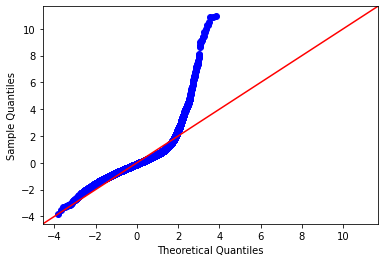

In [44]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This curved QQ plot suggests suggests the residuals are normally distributed. For that reason we will continue with logging in our next iteration. 

**Regression #2 : Using Log-Scaled & Standardized Variables**

Copy X_train from the preprocessing stage

In [45]:
X_train_log = pd.DataFrame.copy(X_train)


Drop`lat` and `long` since `long` already had an extremely low coefficient in iteration 1 (above), and was dropped during our previous attempt at the recursive feature selection (iteration 3 below). 

In [46]:
X_train_log.drop(['lat','long'], axis=1, inplace=True)

Identify the continuous variables we want to log, and apply it to the training data, while leaving the discrete variable unchanged 

In [47]:
log_col = ['income_per_capita', 'age','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']
for col in X_train.columns:
    if col in log_col:
        new_log = np.log(X_train_log[col])
        X_train_log[col] = new_log

Log Y test and train variables

In [48]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

Standardize the X training and test variables

In [49]:
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_log)

In [50]:
X_test_log = pd.DataFrame.copy(X_test)
log_col = ['income_per_capita', 'age','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']
for col in X_test.columns:
    if col in log_col:
        new_log = np.log(X_test_log[col])
        X_test_log[col] = new_log
        

X_test_log.drop(['lat','long'], axis=1, inplace=True)

X_test_log_scaled = scaler.transform(X_test_log)
pd.DataFrame(X_test_log_scaled, columns = X_test_log.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,income_per_capita,age,is_renovated_True,has_basement_True
0,-1.720885,-1.777309,-1.047194,-0.507633,-0.947468,-0.617066,0.289728,0.545674,-0.185041,-0.798653
1,-0.269518,0.040394,0.340620,-0.740839,-0.947468,2.202789,0.289728,0.568632,-0.185041,1.252108
2,-0.269518,0.040394,1.636934,-0.430566,1.022608,0.970994,0.289728,0.836968,-0.185041,1.252108
3,-1.720885,0.040394,-0.476675,-0.517825,0.204953,-0.617066,-1.781086,-0.202973,-0.185041,-0.798653
4,-0.269518,0.040394,-0.910544,-2.329456,2.175029,-0.617066,0.289728,-0.980260,-0.185041,-0.798653
...,...,...,...,...,...,...,...,...,...,...
4111,0.760243,0.625564,0.374560,0.273334,1.022608,-0.617066,-2.047527,-1.205993,-0.185041,-0.798653
4112,0.760243,0.040394,0.271296,0.467214,-0.947468,0.970994,2.564701,0.759783,-0.185041,-0.798653
4113,-0.269518,0.040394,0.729547,-0.642963,-0.947468,2.202789,0.289728,0.698943,-0.185041,1.252108
4114,-0.269518,-1.777309,-0.817404,0.937568,-0.947468,0.970994,-2.047527,0.082948,-0.185041,-0.798653


Distribution of continuous variables look much better in comparison to iteration 1

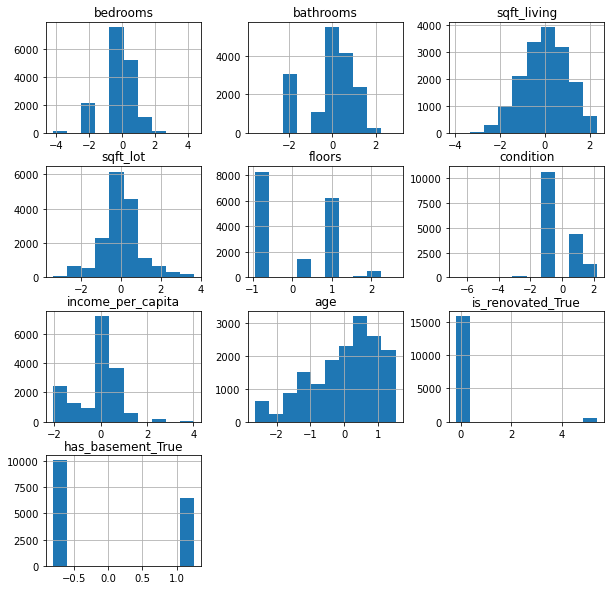

In [51]:
pd.DataFrame(X_train_log_scaled, columns = X_train_log.columns).hist(figsize=[10,10]);

Distribution of dependent variable price also looks much better in comparison to iteration 1

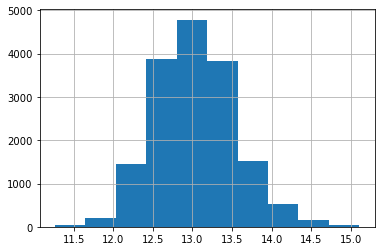

In [52]:
y_train_log.hist(figsize=[6,4]);

In [53]:
X_train_log_scaled = pd.DataFrame(X_train_log_scaled, columns = X_train_log.columns, index = X_train_log.index)
pred2 = sm.add_constant(X_train_log_scaled)
model2 = sm.OLS(endog=y_train_log, exog=pred2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     3290.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:17:22   Log-Likelihood:                -3161.5
No. Observations:               16462   AIC:                             6345.
Df Residuals:                   16451   BIC:                             6430.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0310      0.002   5700.404      0.000      13.026      13.035
bedrooms             -0.0622      0.003    -20.291      0.000      -0.068      -0.056
bathrooms             0.0255      0.004      6.491      0.000       0.018       0.033
sqft_living           0.3225      0.005     71.440      0.000       0.314       0.331
sqft_lot             -0.0248      0.003     -8.331      0.000      -0.031      -0.019
floors                0.0599      0.003     17.263      0.000       0.053       0.067
condition             0.0430      0.003     17.029      0.000       0.038       0.048
income_per_capita     0.2252      0.002     94.993      0.000       0.221       0.230
age                   0.0543      0.003     15.880      0.000       0.048       0.061
is_renovated_True     0.0231      0.002      9.695      0.000       0.018       0.028
has_basement_True     0.0057      0.003      2.002      0.045       0.000       0.011
==============================================================================
Omnibus:                      420.077   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.166
Skew:                           0.186   Prob(JB):                    6.48e-175
Kurtosis:                       4.015   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_test_log_scaled = pd.DataFrame(X_test_log_scaled, columns=X_test_log.columns, index=X_test.index)
X_test_log_scaled 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,income_per_capita,age,is_renovated_True,has_basement_True
9040,-1.720885,-1.777309,-1.047194,-0.507633,-0.947468,-0.617066,0.289728,0.545674,-0.185041,-0.798653
14917,-0.269518,0.040394,0.340620,-0.740839,-0.947468,2.202789,0.289728,0.568632,-0.185041,1.252108
13369,-0.269518,0.040394,1.636934,-0.430566,1.022608,0.970994,0.289728,0.836968,-0.185041,1.252108
10948,-1.720885,0.040394,-0.476675,-0.517825,0.204953,-0.617066,-1.781086,-0.202973,-0.185041,-0.798653
5045,-0.269518,0.040394,-0.910544,-2.329456,2.175029,-0.617066,0.289728,-0.980260,-0.185041,-0.798653
...,...,...,...,...,...,...,...,...,...,...
11775,0.760243,0.625564,0.374560,0.273334,1.022608,-0.617066,-2.047527,-1.205993,-0.185041,-0.798653
6387,0.760243,0.040394,0.271296,0.467214,-0.947468,0.970994,2.564701,0.759783,-0.185041,-0.798653
16119,-0.269518,0.040394,0.729547,-0.642963,-0.947468,2.202789,0.289728,0.698943,-0.185041,1.252108
12015,-0.269518,-1.777309,-0.817404,0.937568,-0.947468,0.970994,-2.047527,0.082948,-0.185041,-0.798653


Calculated the train and test mean squared error for comparison

In [55]:
linreg = LinearRegression()
linreg.fit(X_train_log_scaled, y_train_log)

y_hat_log_train = linreg.predict(X_train_log_scaled)
y_hat_log_test = linreg.predict(X_test_log_scaled)

# take inverse log
y_hat_train = np.exp(y_hat_log_train)
y_hat_test = np.exp(y_hat_log_test)

train_log_scaled_mse = mean_squared_error(y_train, y_hat_train,squared=False)
test_log_scaled_mse = mean_squared_error(y_test, y_hat_test,squared=False)
print('Train RMSE:', train_log_scaled_mse)
print('Test RMSE:', test_log_scaled_mse)



Train RMSE: 201491.05338567487
Test RMSE: 193542.84377070743


QQ Plot of residuals:

<ipython-input-56-963a3d7f22ff>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


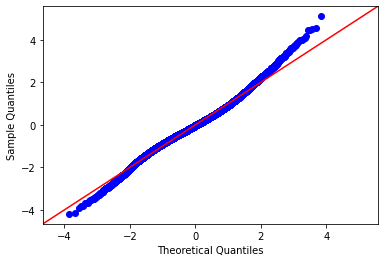

In [56]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This QQ plot validates our assumption of normally distributed residuals

Plot regression results against top regressor `sqft_living`:

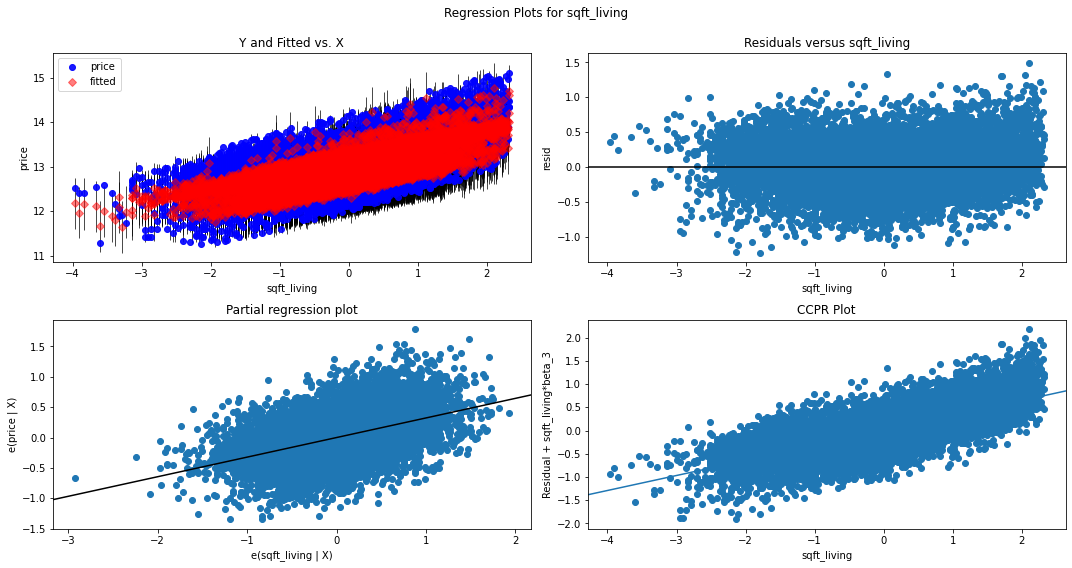

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "sqft_living", fig=fig)
plt.show()

The top right Residual Plot suggests that we pass the assumption of homoskedacity. 

Plot regression results against top regressor `income_per_capita`:

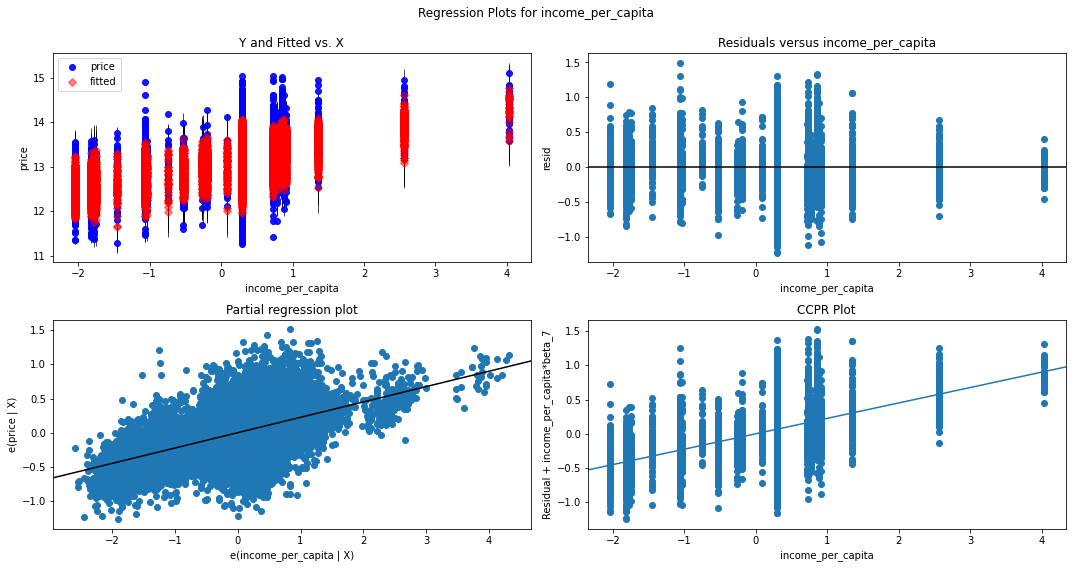

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "income_per_capita", fig=fig)
plt.show()

The top right Residual Plot suggests that we pass the assumption of homoskedacity. 

**Regression #3 : Recursive Feature Elimination**

Use RFE to eliminate "useless" estimators and fit model to new equation

In [59]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(pred2, y_train_log)

In [60]:
selector.support_


array([False,  True, False,  True, False,  True, False,  True,  True,
       False, False])

In [61]:
pred2.columns

Index(['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'income_per_capita', 'age', 'is_renovated_True',
       'has_basement_True'],
      dtype='object')

In [62]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-0.05779107  0.33233588  0.06847048  0.22673261  0.06629078]
13.030970688398263


In [63]:
pred2_columns = list(pred2.columns)
tf = list(selector.support_)
filtered = np.array(pred2_columns)[np.array(tf)]
filtered
pred3 = pred2[filtered]
pred3

,bedrooms,sqft_living,floors,income_per_capita,age
20769,-0.269518,0.259549,1.022608,0.907251,-0.371539
9898,0.760243,0.385770,1.022608,-1.816810,-0.512912
6453,0.760243,2.009697,-0.947468,2.564701,0.206493
6836,1.558987,1.367665,1.022608,-1.816810,-1.051504
16530,0.760243,0.787180,1.022608,0.289728,1.461342
...,...,...,...,...,...
11795,0.760243,0.158582,1.022608,-2.047527,-1.689778
12500,-0.269518,0.640472,-0.947468,-1.063068,0.082948
5626,-0.269518,-0.745360,2.175029,0.289728,-1.578602
877,-0.269518,-0.524859,-0.947468,-0.197541,0.818070


In [64]:
pred3 = sm.add_constant(pred3)
model3 = sm.OLS(endog=y_train_log, exog=pred3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     6246.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:17:25   Log-Likelihood:                -3445.7
No. Observations:               16462   AIC:                             6903.
Df Residuals:                   16456   BIC:                             6950.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0310      0.002   5603.690      0.000      13.026      13.036
bedrooms             -0.0578      0.003    -18.752      0.000      -0.064      -0.052
sqft_living           0.3323      0.003     99.783      0.000       0.326       0.339
floors                0.0685      0.003     23.103      0.000       0.063       0.074
income_per_capita     0.2267      0.002     95.136      0.000       0.222       0.231
age                   0.0663      0.003     22.550      0.000       0.061       0.072
==============================================================================
Omnibus:                      342.117   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.753
Skew:                           0.108   Prob(JB):                    1.67e-150
Kurtosis:                       3.979   Cond. No.                         2.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_test_filtered = X_test_log_scaled[filtered]
X_test_filtered

X_train_filtered = X_train_log_scaled[filtered]
X_train_filtered

,bedrooms,sqft_living,floors,income_per_capita,age
20769,-0.269518,0.259549,1.022608,0.907251,-0.371539
9898,0.760243,0.385770,1.022608,-1.816810,-0.512912
6453,0.760243,2.009697,-0.947468,2.564701,0.206493
6836,1.558987,1.367665,1.022608,-1.816810,-1.051504
16530,0.760243,0.787180,1.022608,0.289728,1.461342
...,...,...,...,...,...
11795,0.760243,0.158582,1.022608,-2.047527,-1.689778
12500,-0.269518,0.640472,-0.947468,-1.063068,0.082948
5626,-0.269518,-0.745360,2.175029,0.289728,-1.578602
877,-0.269518,-0.524859,-0.947468,-0.197541,0.818070


Calculated the train and test mean squared error for comparison

In [66]:
linreg = LinearRegression()
linreg.fit(X_train_filtered, y_train_log)



y_hat_log_train = linreg.predict(X_train_filtered)
y_hat_log_test = linreg.predict(X_test_filtered)

# take inverse log
y_hat_train = np.exp(y_hat_log_train)
y_hat_test = np.exp(y_hat_log_test)

train_log_scaled_mse = mean_squared_error(y_train, y_hat_train,squared=False)
test_log_scaled_mse = mean_squared_error(y_test, y_hat_test,squared=False)
print('Train RMSE:', train_log_scaled_mse)
print('Test RMSE:', test_log_scaled_mse)

Train RMSE: 204917.61876399175
Test RMSE: 196818.56511732526


QQ Plot of residual:

<ipython-input-67-5e6fafc94ff2>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


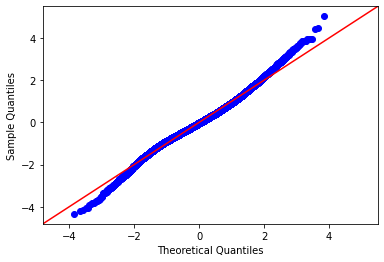

In [67]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This QQ plot continues to validate our assumption of normally distributed residuals

Plot regression results against one regressor:

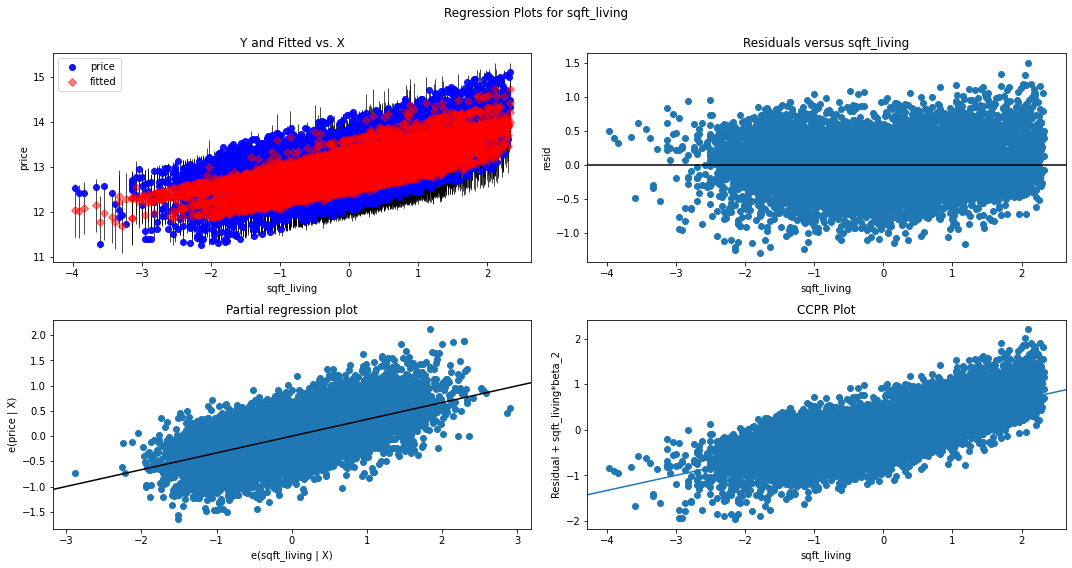

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model3, "sqft_living", fig=fig)
plt.show()

The top right Residual Plot suggests that we pass the assumption of homoskedacity. 

In [69]:
X = data[['income_per_capita', 'age','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature        VIF
0  income_per_capita  17.896824
1                age   6.397486
2           bedrooms  22.947003
3          bathrooms  24.970478
4        sqft_living  19.216245
5           sqft_lot   1.800153
6             floors  10.717147
7          condition  22.593295


# Visualizations

**Mean Price by # of Bathrooms**

Text(0, 0.5, 'Price (in Millions)')

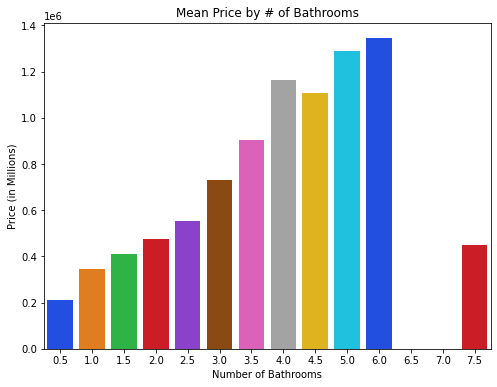

In [70]:
df_graph = dummy.groupby('bathrooms')['price'].mean()
df_graph=pd.DataFrame(df_graph)
df_graph.reset_index(inplace=True)
df_graph.loc[len(df_graph.index)] = ['6.5', 0] 
df_graph.loc[len(df_graph.index)] = ['7.0', 0] 
df_graph['bathrooms']=df_graph['bathrooms'].astype(float, copy=False)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='bathrooms', y='price', data=df_graph, palette="bright")
ax.set_title('Mean Price by # of Bathrooms')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Price (in Millions)')

**Price by Square Feet**

Text(0.5, 1.0, 'Price Vs. Square Feet')

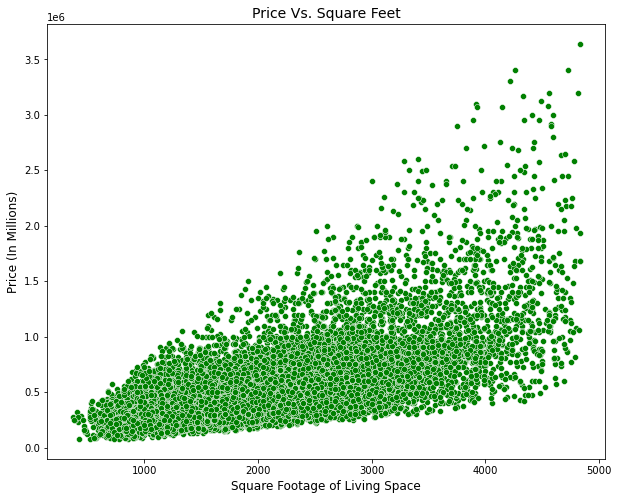

In [71]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x='sqft_living', y='price', data=dummy,color='Green')
ax.set_xlabel('Square Footage of Living Space', fontsize=12)
ax.set_ylabel('Price (In Millions)', fontsize=12)
ax.set_title("Price Vs. Square Feet", fontsize=14)

In [72]:
df_income = dummy[['income_per_capita','price']]
df_income = pd.DataFrame(df_income.groupby('income_per_capita')['price'].mean()).reset_index()
df_income
income_buckets = ([25496.0, 30000.0, 35000.0, 40000.0, 50000.0, 75000, 106393.0])
df_income['income_buckets'] = pd.cut(df_income['income_per_capita'],income_buckets, precision=0, labels = ["$25k - $30k", "$30k - $35k", "$35k - $40k","$40k - $50k","$50k - $75k","$75k - $100k"])
df_income['income_buckets'] 
df_graph = pd.DataFrame(df_income.groupby('income_buckets')['price'].mean()).reset_index() 
# df_graph

Text(0, 0.5, 'Home Price (in Millions)')

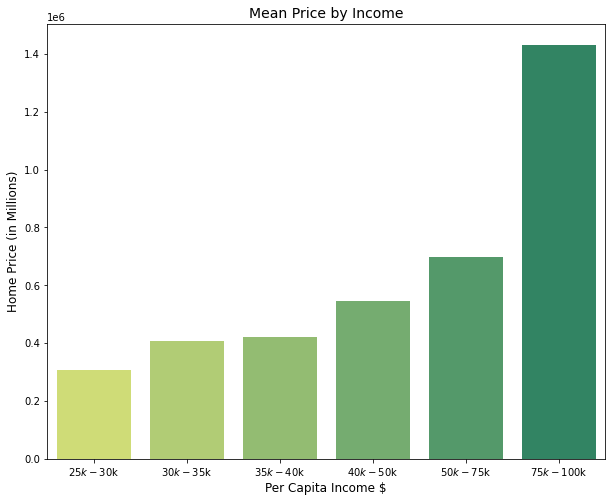

In [73]:


plt.figure(figsize=(10,8))
ax = sns.barplot(x='income_buckets', y='price', data=df_graph, palette="summer_r")
ax.set_title('Mean Price by Income', fontsize=14)
ax.set_xlabel('Per Capita Income $', fontsize=12)
ax.set_ylabel('Home Price (in Millions)', fontsize=12)
